In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

In [3]:
# Configuração do estilo
plt.style.use('default')
sns.set_palette("gray")  # Paleta de cinza

TESTE DE NORMALIDADE - SHAPIRO-WILK
Nº Hip. Adequadas: W = 0.750, p = 0.0000
  → Distribuição NÃO normal (p < 0.05)
Nº Hip. Não Adequadas: W = 0.287, p = 0.0000
  → Distribuição NÃO normal (p < 0.05)

TESTE DE COMPARAÇÃO ENTRE GRUPOS
Teste de Mann-Whitney U:
U = 13725.500
p-value = 0.0000
Há diferença estatisticamente significativa entre hipóteses adequadas e não adequadas
Tamanho do efeito (r): 0.937


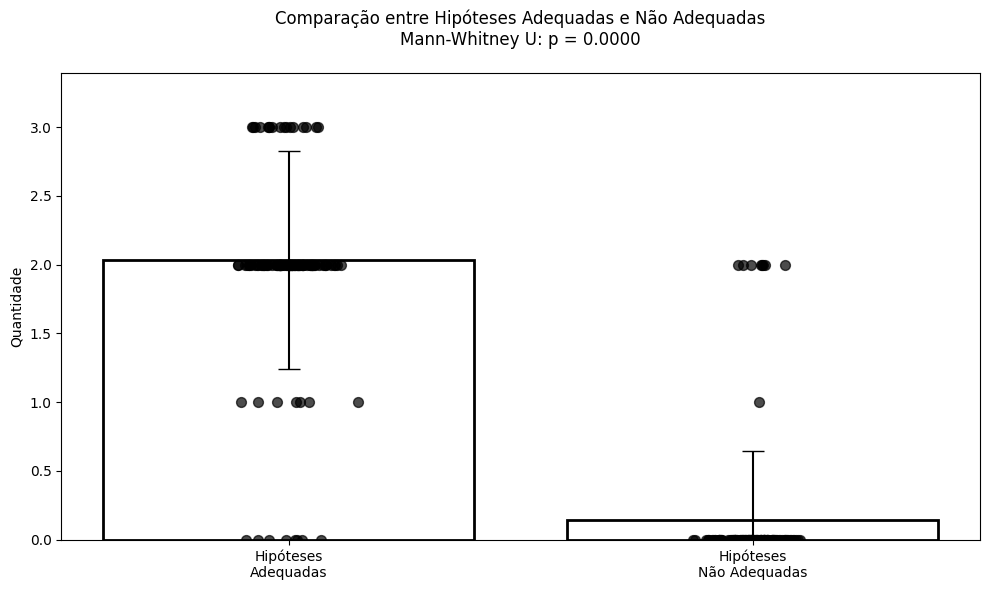


ESTATÍSTICAS DESCRITIVAS
Hipóteses Adequadas: Média = 2.03, DP = 0.80
Hipóteses Não Adequadas: Média = 0.14, DP = 0.51
Total de hipóteses: 263
Proporção de adequação: 93.5%


In [6]:
# Criando DataFrame
data = {
    'ID': [f'Aluno_{i+1:03d}' for i in range(121)],
    'Nº de Hipóteses': [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,2,2,2,2,2,2,2,2,3,3,3,3,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2],
    'Nº Hip. Adequadas': [2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,0,0,0,0,0,0,0,0,3,3,3,3,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2]
}
df = pd.DataFrame(data)
# Calcular hipóteses não adequadas
df['Nº Hip. Não Adequadas'] = df['Nº de Hipóteses'] - df['Nº Hip. Adequadas']

# Dados para comparação
data = df[['Nº Hip. Adequadas', 'Nº Hip. Não Adequadas']]

# Médias e desvios padrão
means = data.mean()
stds = data.std()

# Teste de normalidade - Shapiro-Wilk
print("="*50)
print("TESTE DE NORMALIDADE - SHAPIRO-WILK")
print("="*50)

for col in data.columns:
    stat, p = shapiro(data[col])
    print(f"{col}: W = {stat:.3f}, p = {p:.4f}")
    if p > 0.05:
        print(f"  → Distribuição normal (p > 0.05)")
    else:
        print(f"  → Distribuição NÃO normal (p < 0.05)")

# Teste de comparação entre grupos
print("\n" + "="*50)
print("TESTE DE COMPARAÇÃO ENTRE GRUPOS")
print("="*50)

# Como ambas as variáveis provavelmente não são normais, usamos Mann-Whitney U
stat, p = mannwhitneyu(data['Nº Hip. Adequadas'], data['Nº Hip. Não Adequadas'], alternative='two-sided')

print(f"Teste de Mann-Whitney U:")
print(f"U = {stat:.3f}")
print(f"p-value = {p:.4f}")

# Interpretação
alpha = 0.05
if p > alpha:
    print("Não há diferença estatisticamente significativa entre hipóteses adequadas e não adequadas")
else:
    print("Há diferença estatisticamente significativa entre hipóteses adequadas e não adequadas")

# Tamanho do efeito
n1 = len(data['Nº Hip. Adequadas'])
n2 = len(data['Nº Hip. Não Adequadas'])
effect_size = stat / (n1 * n2)
print(f"Tamanho do efeito (r): {effect_size:.3f}")

# Gráfico de barras
plt.figure(figsize=(10, 6))

# Primeiro plote os pontos individuais
for i, col in enumerate(data.columns):
    y_values = data[col].values
    x_positions = np.full(len(y_values), i) + np.random.normal(0, 0.05, len(y_values))  # Jitter horizontal
    plt.scatter(x_positions, y_values, color='black', alpha=0.7, s=50, zorder=2)

# Depois plote as barras em branco por cima
bars = plt.bar(range(len(means)), means, yerr=stds, capsize=8, color='white', 
               edgecolor='black', linewidth=2, alpha=1.0, zorder=1)

# Rótulos
plt.xticks(range(len(means)), ['Hipóteses\nAdequadas', 'Hipóteses\nNão Adequadas'])
plt.ylabel('Quantidade')
plt.title('Comparação entre Hipóteses Adequadas e Não Adequadas\n' + 
          f'Mann-Whitney U: p = {p:.4f}', pad=20)

plt.ylim(0, max(means + stds) * 1.2)  # Ajustar limite do eixo Y
plt.grid(False)
plt.tight_layout()

plt.savefig('Figura 1.png', dpi=600, bbox_inches='tight')
plt.show()

# Estatísticas descritivas adicionais
print("\n" + "="*50)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*50)
print(f"Hipóteses Adequadas: Média = {means['Nº Hip. Adequadas']:.2f}, DP = {stds['Nº Hip. Adequadas']:.2f}")
print(f"Hipóteses Não Adequadas: Média = {means['Nº Hip. Não Adequadas']:.2f}, DP = {stds['Nº Hip. Não Adequadas']:.2f}")
print(f"Total de hipóteses: {df['Nº de Hipóteses'].sum()}")
print(f"Proporção de adequação: {df['Nº Hip. Adequadas'].sum()/df['Nº de Hipóteses'].sum():.1%}")

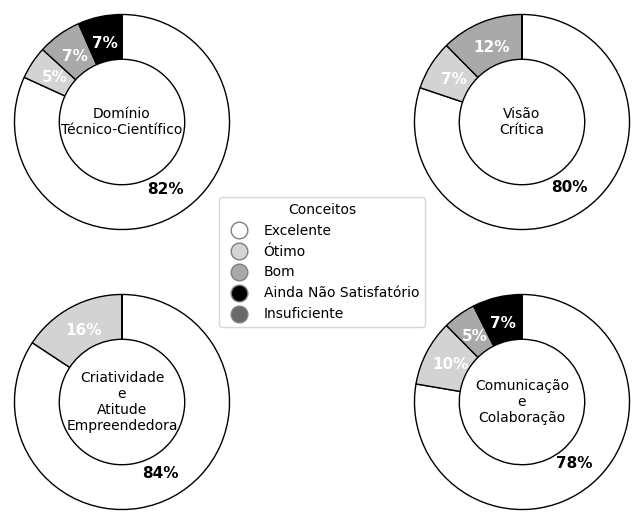

In [7]:
# Dados fornecidos
data = {
    'ID': [f'Aluno_{i+1:03d}' for i in range(121)],
    'Domínio Técnico-Científico': ['E','E','E','E','B','O','O','B','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','ANS','ANS','ANS','ANS','ANS','ANS','ANS','ANS','E','E','E','E','E','E','B','B','B','B','B','B','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','O','O','O','O','E','E','E','E','E','E','E','E','E'],
    'Visão Crítica': ['O','O','O','O','O','E','E','B','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','B','B','B','B','B','B','B','B','E','E','E','E','E','E','B','B','B','B','B','B','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','O','O','O','O','E','E','E','E','E'],
    'Criatividade e Atitude Empreendedora': ['O','O','O','O','E','E','E','O','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','O','O','O','O','O','O','O','O','E','E','E','E','E','E','O','O','O','O','O','O','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E'],
    'Comunicação e Colaboração': ['B','B','B','B','B','O','O','ANS','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','B','E','E','E','E','E','E','E','E','ANS','ANS','ANS','ANS','ANS','ANS','ANS','ANS','E','E','E','E','E','E','E','E','E','E','E','E','O','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','O','O','O','O','O','O','O','O','O','E','E','E','E'],
    'Autonomia Digital': ['E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E','E']
}

# Criar DataFrame
df = pd.DataFrame(data)

# Cores
colors = {'E': 'white', 'O': 'lightgray', 'B': 'darkgray', 'ANS': 'black', 'I': 'dimgray'}

# Frequências relativas
competences = ['Domínio Técnico-Científico', 'Visão Crítica', 
               'Criatividade e Atitude Empreendedora', 
               'Comunicação e Colaboração', 'Autonomia Digital']

freq_rel = pd.DataFrame()
for comp in competences:
    counts = df[comp].value_counts(normalize=True) * 100
    freq_rel[comp] = counts.reindex(['E', 'O', 'B', 'ANS', 'I'], fill_value=0)
freq_rel = freq_rel.T

# Gráficos
competences_plot = ['Domínio Técnico-Científico', 'Visão Crítica', 
                    'Criatividade e Atitude Empreendedora', 'Comunicação e Colaboração']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, comp in enumerate(competences_plot):
    valores = freq_rel.loc[comp]
    wedges, texts = axes[i].pie(
        valores,
        labels=None,
        colors=[colors[c] for c in valores.index],
        startangle=90,
        counterclock=False,
        radius=1.2,
        wedgeprops=dict(width=0.5, edgecolor='black', linewidth=1),
        autopct=None,
        textprops={'fontsize': 10}
    )
    for wedge, v, k in zip(wedges, valores, valores.index):
        if v > 0:
            ang = (wedge.theta2 + wedge.theta1) / 2
            x = 0.9 * np.cos(np.deg2rad(ang))
            y = 0.9 * np.sin(np.deg2rad(ang))
            txt_color = 'black' if colors[k] == 'white' else 'white'
            axes[i].text(x, y, f"{v:.0f}%", ha='center', va='center', 
                         color=txt_color, fontsize=11, fontweight='bold')
    axes[i].text(0, 0, comp.replace(' ', '\n'), ha='center', va='center', 
                 fontsize=10, color='black', wrap=True)
    axes[i].set_aspect('equal')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Legenda única centralizada
legend_labels = ['Excelente', 'Ótimo', 'Bom', 'Ainda Não Satisfatório', 'Insuficiente']
legend_colors = ['white', 'lightgray', 'darkgray', 'black', 'dimgray']

legend_patches = [
    plt.Line2D(
        [0], [0],
        marker='o', color='w',
        markerfacecolor=col,
        markersize=12,
        markeredgecolor='gray',   # <<< cor da borda
        markeredgewidth=1,       # <<< espessura da borda
        label=lab
    )
    for lab, col in zip(legend_labels, legend_colors)
]

# Legenda no centro da figura
fig.legend(
    handles=legend_patches,
    loc='center',               # <<< coloca no centro
    bbox_to_anchor=(0.5, 0.5),  # <<< âncora no meio
    title="Conceitos",
    frameon=True                # <<< coloca uma caixa de fundo
)

# Ajuste de layout
plt.subplots_adjust(
    wspace=0.25,  # <<< aumenta o espaço horizontal entre os donuts
    hspace=0.25,  # <<< aumenta o espaço vertical entre os donuts
    left=0.05,    # <<< empurra os gráficos para a esquerda
    right=0.95,   # <<< empurra os gráficos para a direita
    top=0.92,
    bottom=0.08
)
plt.savefig('Figura 2.png', dpi=600, bbox_inches='tight', facecolor='white')
plt.show()